In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!python "/content/drive/MyDrive/dataset/dataset1/human+activity+recognition+using+smartphones/UCI HAR Dataset/CombineScript.py"

/content/drive/MyDrive/dataset/dataset1/human+activity+recognition+using+smartphones/UCI HAR Dataset/CombineScript.py:35: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  total_acc_x = pd.read_csv(os.path.join(train_path,"Inertial Signals","total_acc_x_train.txt"),delim_whitespace=True,header=None)
/content/drive/MyDrive/dataset/dataset1/human+activity+recognition+using+smartphones/UCI HAR Dataset/CombineScript.py:36: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  total_acc_y = pd.read_csv(os.path.join(train_path,"Inertial Signals","total_acc_y_train.txt"),delim_whitespace=True,header=None)
/content/drive/MyDrive/dataset/dataset1/human+activity+recognition+using+smartphones/UCI HAR Dataset/CombineScript.py:37: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be r

**HAR QUESTION**

In [ ]:
!python "/content/drive/MyDrive/dataset/dataset1/human+activity+recognition+using+smartphones/UCI HAR Dataset/MakeDataset.py"


Training data shape:  (126, 500, 3)
Testing data shape:  (54, 500, 3)


**TASK-1**

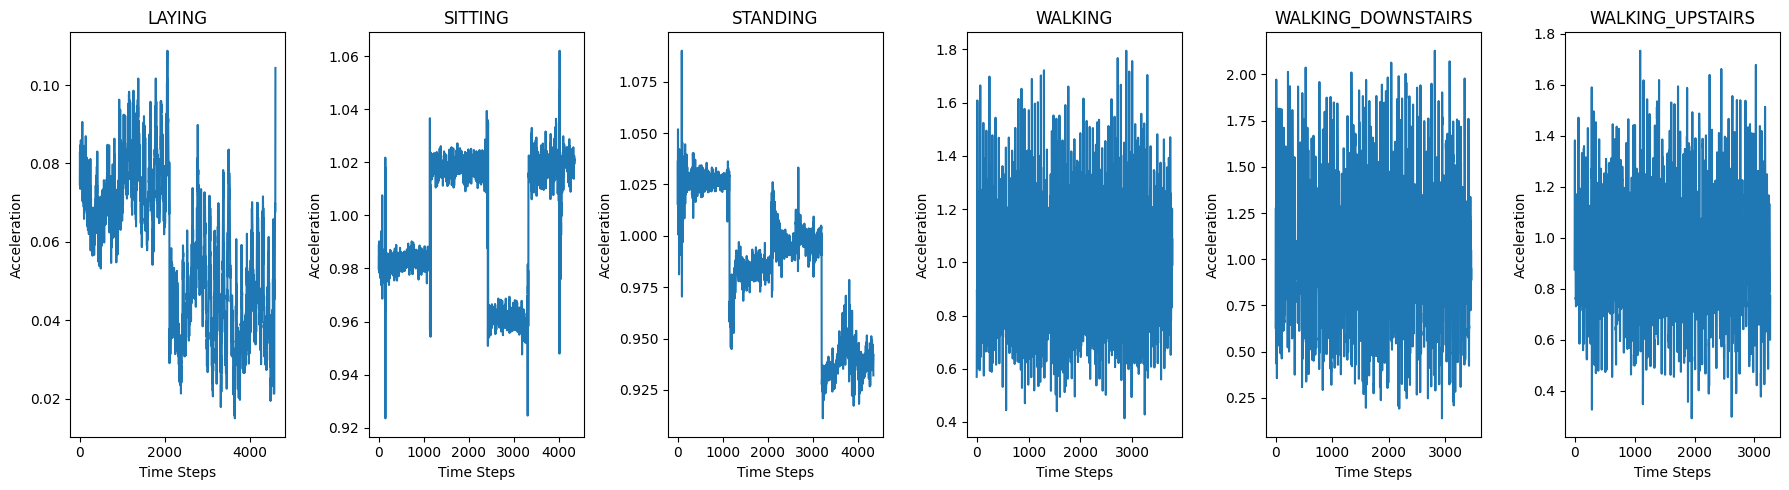

In [ ]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Path to Combined folder
combined_path = "/content/Combined"  # <-- change this

# Activities
folders = ["LAYING","SITTING","STANDING","WALKING","WALKING_DOWNSTAIRS","WALKING_UPSTAIRS"]

# Dictionary to store one sample per activity
samples = {}

# Loop through Train and Test folders
for dataset_type in ["Train", "Test"]:
    dataset_path = os.path.join(combined_path, dataset_type)
    for folder in folders:
        # Skip if already have a sample for this activity
        if folder in samples:
            continue
        folder_path = os.path.join(dataset_path, folder)
        files = os.listdir(folder_path)
        if files:
            # Take the first sample
            df = pd.read_csv(os.path.join(folder_path, files[0]))
            samples[folder] = df.values

# Plot waveforms (6-column subplot)
plt.figure(figsize=(18,5))
for i, activity in enumerate(folders):
    sample = samples[activity]
    plt.subplot(1,6,i+1)
    plt.plot(sample[:,0])  # plot first accelerometer axis (X-axis)
    plt.title(activity)
    plt.xlabel("Time Steps")
    plt.ylabel("Acceleration")

plt.tight_layout()
plt.show()


In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

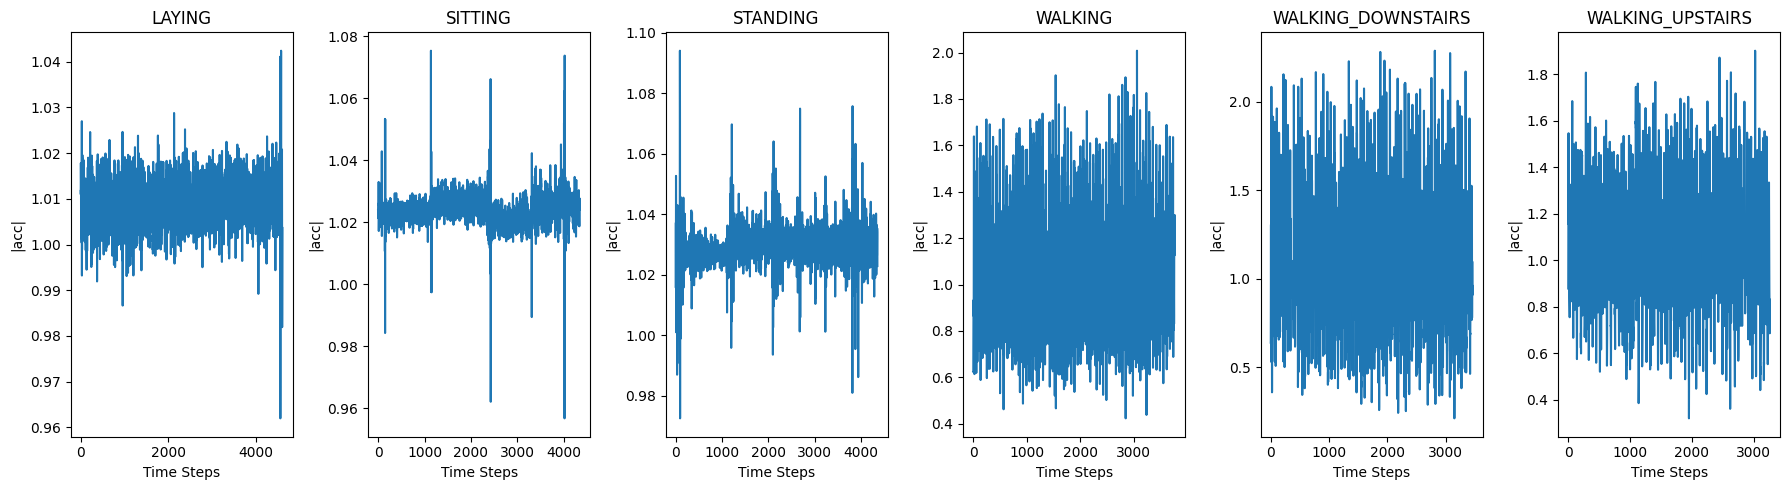

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd

# Path to Combined folder
combined_path = "/content/Combined"  # <-- change this

folders = ["LAYING","SITTING","STANDING","WALKING","WALKING_DOWNSTAIRS","WALKING_UPSTAIRS"]

# Dictionary to store one sample per activity (Train+Test)
samples = {}
for dataset_type in ["Train", "Test"]:
    dataset_path = os.path.join(combined_path, dataset_type)
    for folder in folders:
        if folder in samples:
            continue
        folder_path = os.path.join(dataset_path, folder)
        files = os.listdir(folder_path)
        if files:
            df = pd.read_csv(os.path.join(folder_path, files[0]))
            samples[folder] = df.values

# Calculate linear acceleration magnitude and plot
plt.figure(figsize=(18,5))
for i, activity in enumerate(folders):
    sample = samples[activity]
    # Linear acceleration magnitude
    acc_mag = np.sqrt(sample[:,0]**2 + sample[:,1]**2 + sample[:,2]**2)
    plt.subplot(1,6,i+1)
    plt.plot(acc_mag)
    plt.title(activity)
    plt.xlabel("Time Steps")
    plt.ylabel("|acc|")

plt.tight_layout()
plt.show()


In [ ]:
!pip install tsfel


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.4/63.4 kB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 19.8 MB/s eta 0:00:00


In [ ]:
import os
import pandas as pd
import numpy as np

# -------------------------
# Paths
# -------------------------
combined_path = "/content/Combined"  # <-- change this

# Activities
folders = ["LAYING","SITTING","STANDING","WALKING","WALKING_DOWNSTAIRS","WALKING_UPSTAIRS"]
classes = {"WALKING":1,"WALKING_UPSTAIRS":2,"WALKING_DOWNSTAIRS":3,"SITTING":4,"STANDING":5,"LAYING":6}

# Parameters
time_steps = 500  # first 10 seconds at 50Hz

# -------------------------
# Function to load data
# -------------------------
def load_data(dataset_path, time_steps=500):
    X, y = [], []
    for folder in folders:
        folder_path = os.path.join(dataset_path, folder)
        files = os.listdir(folder_path)
        for file in files:
            df = pd.read_csv(os.path.join(folder_path, file), header=0)
            # Truncate or pad to fixed length
            data = df.values
            if data.shape[0] >= time_steps:
                data = data[:time_steps, :]
            else:
                # Pad with zeros if shorter
                padding = np.zeros((time_steps - data.shape[0], data.shape[1]))
                data = np.vstack((data, padding))
            X.append(data)
            y.append(classes[folder])
    X = np.array(X)
    y = np.array(y)
    return X, y

# -------------------------
# Load Train and Test sets
# -------------------------
X_train, y_train = load_data(os.path.join(combined_path, "Train"), time_steps=time_steps)
X_test, y_test   = load_data(os.path.join(combined_path, "Test"), time_steps=time_steps)

print("X_train shape:", X_train.shape)  # (num_samples, 500, num_features)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)


X_train shape: (126, 500, 3)
y_train shape: (126,)
X_test shape: (54, 500, 3)
y_test shape: (54,)


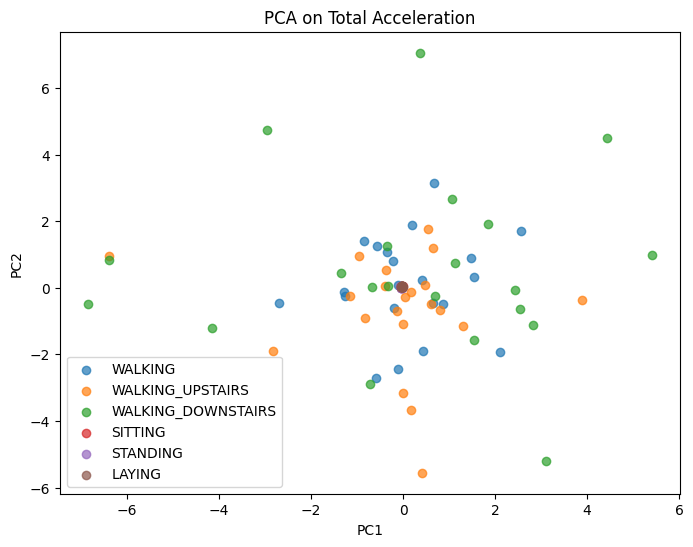

In [ ]:
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Compute Total Acceleration magnitude for each sample
# X_train shape: (num_samples, time_steps, num_features)
total_acc = np.sqrt(np.sum(X_train**2, axis=2))  # shape: (num_samples, time_steps)

# Flatten time series for PCA
total_acc_flat = total_acc  # (num_samples, time_steps)

# PCA to 2D
pca_total = PCA(n_components=2)
total_acc_pca = pca_total.fit_transform(total_acc_flat)

# Scatter plot
activity_labels = {
    1: "WALKING",
    2: "WALKING_UPSTAIRS",
    3: "WALKING_DOWNSTAIRS",
    4: "SITTING",
    5: "STANDING",
    6: "LAYING"
}

plt.figure(figsize=(8,6))
for label in np.unique(y_train):
    idx = np.where(y_train == label)
    plt.scatter(total_acc_pca[idx,0], total_acc_pca[idx,1], label=activity_labels[label], alpha=0.7)
plt.title("PCA on Total Acceleration")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.legend()
plt.show()


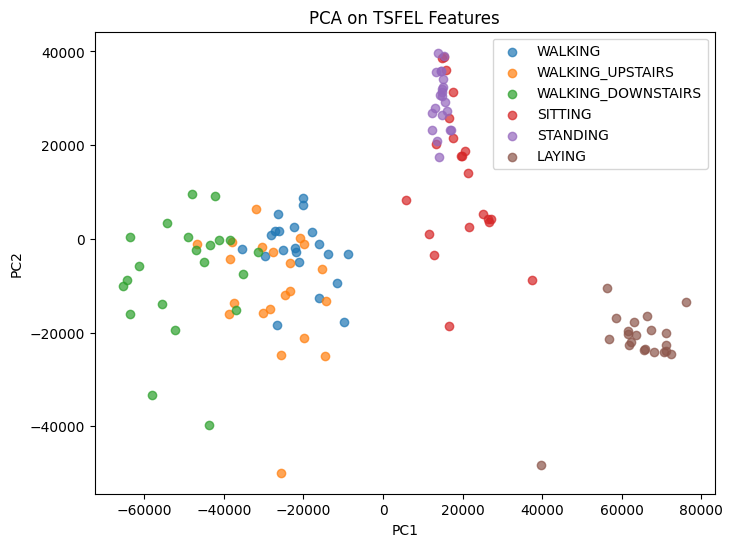

In [ ]:

import warnings
import tsfel
import pandas as pd
import numpy as np

# Suppress warnings
warnings.filterwarnings("ignore")

# Get default TSFEL features (all domains)
cfg = tsfel.get_features_by_domain()

# Extract TSFEL features for each sample
X_tsfel = []
for sample in X_train:
    df = pd.DataFrame(sample)  # TSFEL expects a DataFrame
    features = tsfel.time_series_features_extractor(cfg, df, verbose=0)
    X_tsfel.append(features.values[0])
X_tsfel = np.array(X_tsfel)

# PCA to 2D
pca_tsfel = PCA(n_components=2)
tsfel_pca = pca_tsfel.fit_transform(X_tsfel)

# Scatter plot
plt.figure(figsize=(8,6))
for label in np.unique(y_train):
    idx = np.where(y_train == label)
    plt.scatter(tsfel_pca[idx,0], tsfel_pca[idx,1], label=activity_labels[label], alpha=0.7)
plt.title("PCA on TSFEL Features")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.legend()
plt.show()


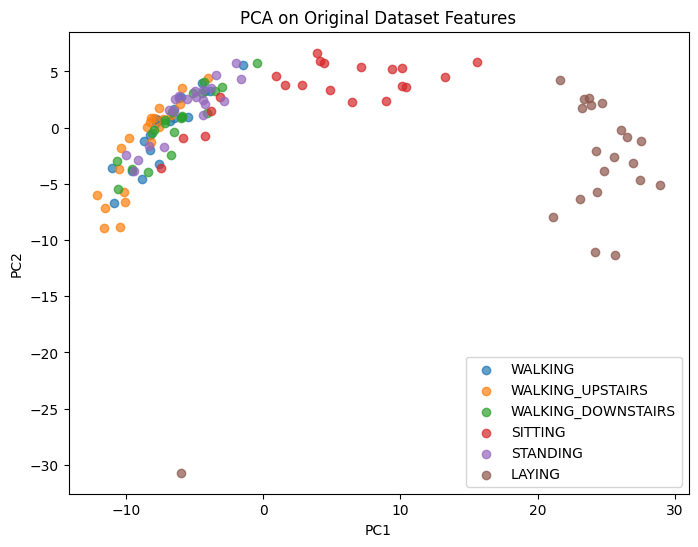

In [ ]:
# Flatten original dataset features: each sample -> 1D vector
X_flat = X_train.reshape(X_train.shape[0], -1)

# PCA to 2D
pca_dataset = PCA(n_components=2)
dataset_pca = pca_dataset.fit_transform(X_flat)

# Scatter plot
plt.figure(figsize=(8,6))
for label in np.unique(y_train):
    idx = np.where(y_train == label)
    plt.scatter(dataset_pca[idx,0], dataset_pca[idx,1], label=activity_labels[label], alpha=0.7)
plt.title("PCA on Original Dataset Features")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.legend()
plt.show()


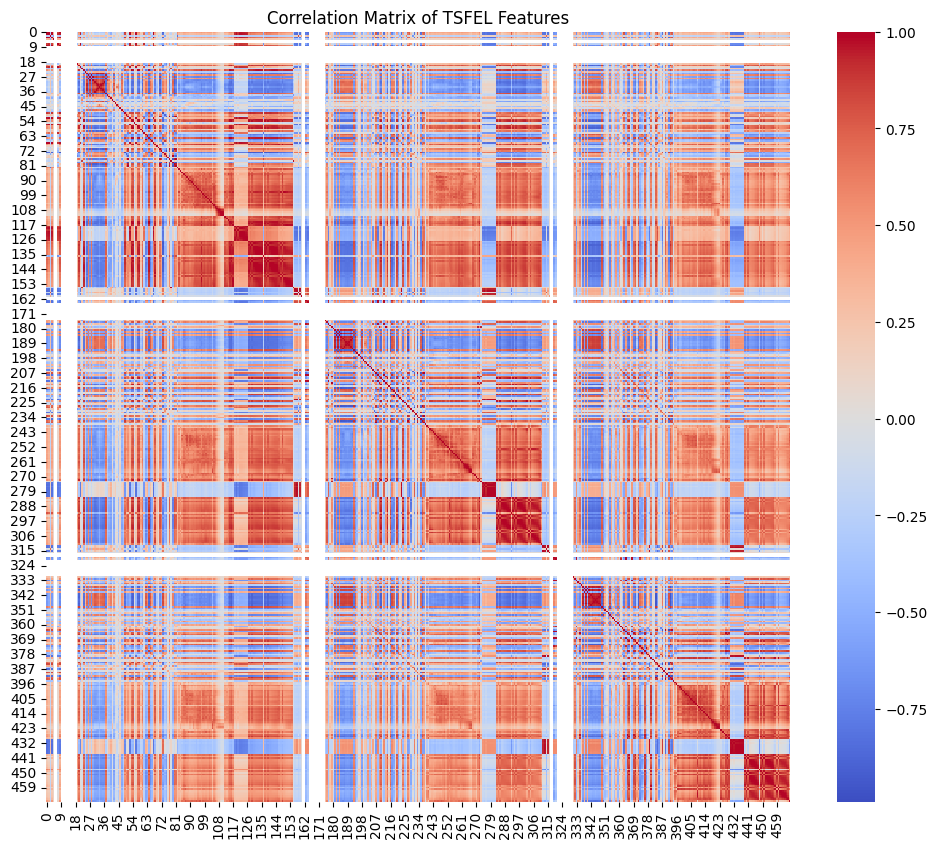

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import tsfel

# Suppress warnings
warnings.filterwarnings("ignore")

# TSFEL feature extraction (already done)
cfg = tsfel.get_features_by_domain()
X_tsfel_list = []

for sample in X_train:
    df = pd.DataFrame(sample)
    features = tsfel.time_series_features_extractor(cfg, df, verbose=0)
    X_tsfel_list.append(features.values[0])

# Convert to DataFrame
X_tsfel_df = pd.DataFrame(X_tsfel_list)

# Compute correlation matrix
corr_tsfel = X_tsfel_df.corr()

# Plot heatmap
plt.figure(figsize=(12,10))
sns.heatmap(corr_tsfel, cmap='coolwarm', center=0, cbar=True)
plt.title("Correlation Matrix of TSFEL Features")
plt.show()


In [ ]:
# Find pairs with correlation > 0.9 (or < -0.9)
threshold = 0.9
high_corr = []

for i in range(len(corr_tsfel.columns)):
    for j in range(i):
        if abs(corr_tsfel.iloc[i,j]) > threshold:
            high_corr.append((corr_tsfel.columns[i], corr_tsfel.columns[j], corr_tsfel.iloc[i,j]))

print("Highly correlated TSFEL feature pairs (>0.9):")
for f1, f2, val in high_corr:
    print(f"{f1} <--> {f2} : correlation = {val:.2f}")


Highly correlated TSFEL feature pairs (>0.9):
1 <--> 0 : correlation = 0.98
3 <--> 0 : correlation = 1.00
3 <--> 1 : correlation = 0.98
7 <--> 1 : correlation = 0.92
8 <--> 0 : correlation = 0.97
8 <--> 1 : correlation = 0.95
8 <--> 3 : correlation = 0.97
21 <--> 1 : correlation = 0.93
21 <--> 7 : correlation = 0.97
28 <--> 26 : correlation = 1.00
29 <--> 27 : correlation = 1.00
31 <--> 25 : correlation = 0.94
32 <--> 25 : correlation = 0.94
32 <--> 31 : correlation = 0.94
33 <--> 32 : correlation = 0.90
34 <--> 25 : correlation = 0.94
34 <--> 31 : correlation = 0.94
34 <--> 32 : correlation = 1.00
34 <--> 33 : correlation = 0.90
35 <--> 25 : correlation = 0.94
35 <--> 31 : correlation = 1.00
35 <--> 32 : correlation = 0.94
35 <--> 34 : correlation = 0.94
36 <--> 30 : correlation = 1.00
37 <--> 26 : correlation = 0.93
37 <--> 28 : correlation = 0.93
37 <--> 31 : correlation = -0.91
37 <--> 35 : correlation = -0.91
49 <--> 8 : correlation = 0.94
52 <--> 0 : correlation = 0.97
52 <--> 1 

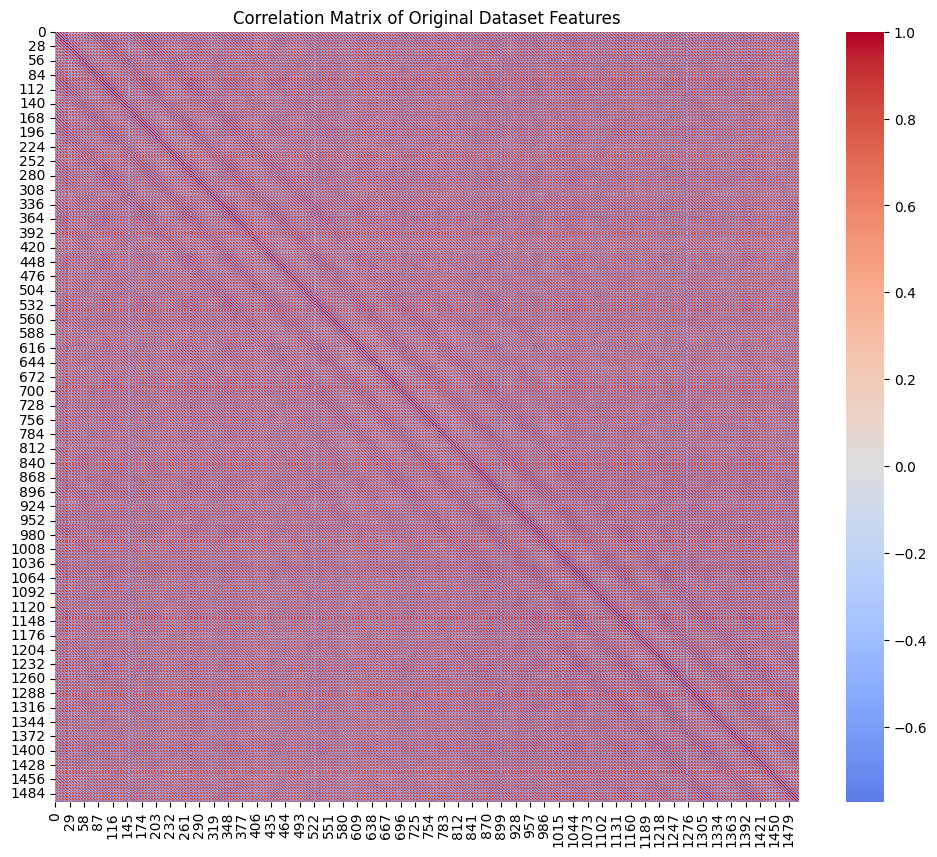

Streaming output truncated to the last 5000 lines.
1454 <--> 959 : correlation = 0.91
1454 <--> 962 : correlation = 0.90
1454 <--> 974 : correlation = 0.91
1454 <--> 977 : correlation = 0.92
1454 <--> 980 : correlation = 0.92
1454 <--> 983 : correlation = 0.93
1454 <--> 986 : correlation = 0.91
1454 <--> 1007 : correlation = 0.90
1454 <--> 1010 : correlation = 0.91
1454 <--> 1013 : correlation = 0.91
1454 <--> 1016 : correlation = 0.91
1454 <--> 1025 : correlation = 0.91
1454 <--> 1028 : correlation = 0.92
1454 <--> 1031 : correlation = 0.93
1454 <--> 1034 : correlation = 0.93
1454 <--> 1037 : correlation = 0.93
1454 <--> 1040 : correlation = 0.93
1454 <--> 1043 : correlation = 0.93
1454 <--> 1046 : correlation = 0.93
1454 <--> 1049 : correlation = 0.94
1454 <--> 1052 : correlation = 0.94
1454 <--> 1055 : correlation = 0.94
1454 <--> 1058 : correlation = 0.93
1454 <--> 1061 : correlation = 0.93
1454 <--> 1064 : correlation = 0.93
1454 <--> 1067 : correlation = 0.93
1454 <--> 1070 : cor

In [ ]:
# Flatten each sample for dataset features
X_flat = X_train.reshape(X_train.shape[0], -1)
X_flat_df = pd.DataFrame(X_flat)

# Compute correlation
corr_dataset = X_flat_df.corr()

# Plot heatmap
plt.figure(figsize=(12,10))
sns.heatmap(corr_dataset, cmap='coolwarm', center=0, cbar=True)
plt.title("Correlation Matrix of Original Dataset Features")
plt.show()

# Identify highly correlated pairs
high_corr_dataset = []

for i in range(len(corr_dataset.columns)):
    for j in range(i):
        if abs(corr_dataset.iloc[i,j]) > threshold:
            high_corr_dataset.append((corr_dataset.columns[i], corr_dataset.columns[j], corr_dataset.iloc[i,j]))

print("Highly correlated dataset feature pairs (>0.9):")
for f1, f2, val in high_corr_dataset:
    print(f"{f1} <--> {f2} : correlation = {val:.2f}")


**task-2**

In [ ]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, classification_report
import tsfel
import warnings

warnings.filterwarnings("ignore")


In [ ]:
# Flatten raw accelerometer data
# Example: load full dataset (adjust paths accordingly)

X_train_raw = X_train.reshape(X_train.shape[0], -1)
X_test_raw  = X_test.reshape(X_test.shape[0], -1)


In [ ]:
cfg = tsfel.get_features_by_domain()  # default config

# Extract TSFEL features for train
X_train_tsfel = []
for sample in X_train:
    df = pd.DataFrame(sample)
    features = tsfel.time_series_features_extractor(cfg, df, verbose=0)
    X_train_tsfel.append(features.values[0])
X_train_tsfel = np.array(X_train_tsfel)

# Extract TSFEL features for test
X_test_tsfel = []
for sample in X_test:
    df = pd.DataFrame(sample)
    features = tsfel.time_series_features_extractor(cfg, df, verbose=0)
    X_test_tsfel.append(features.values[0])
X_test_tsfel = np.array(X_test_tsfel)


In [ ]:
X_train_dataset = X_train.reshape(X_train.shape[0], -1)
X_test_dataset  = X_test.reshape(X_test.shape[0], -1)
# Raw accelerometer dataset



In [ ]:
def train_evaluate_decision_tree(X_train, X_test, y_train, y_test, description=""):
    clf = DecisionTreeClassifier(random_state=42)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    # Raw accelerometer dataset
    X_train_raw, y_train = Combining_Datasets(train_dir, target_len=500, use_resample=True)
    X_test_raw, y_test   = Combining_Datasets(test_dir, target_len=500, use_resample=True)

    print(f"=== Results for {description} ===")
    print("Accuracy :", accuracy_score(y_test, y_pred))
    print("Precision:", precision_score(y_test, y_pred, average='macro'))
    print("Recall   :", recall_score(y_test, y_pred, average='macro'))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("\nClassification Report:\n", classification_report(y_test, y_pred))
    print("========================================\n")


In [ ]:
# 1. Raw Accelerometer Data
train_evaluate_decision_tree(X_train_raw, X_test_raw, y_train, y_test, "Raw Accelerometer Data")

# 2. TSFEL Features
train_evaluate_decision_tree(X_train_tsfel, X_test_tsfel, y_train, y_test, "TSFEL Features")

# 3. Flattened Dataset Features
train_evaluate_decision_tree(X_train_dataset, X_test_dataset, y_train, y_test, "Dataset Features")


NameError: name 'Combining_Datasets' is not defined

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import tsfel
import warnings

warnings.filterwarnings("ignore")


In [ ]:
depths = range(2, 9)  # 2 to 8

# To store accuracy
acc_raw = []
acc_tsfel = []
acc_dataset = []

for d in depths:
    # Raw accelerometer
    clf_raw = DecisionTreeClassifier(max_depth=d, random_state=42)
    clf_raw.fit(X_train_raw, y_train)
    y_pred_raw = clf_raw.predict(X_test_raw)
    acc_raw.append(accuracy_score(y_test, y_pred_raw))

    # TSFEL features
    clf_tsfel = DecisionTreeClassifier(max_depth=d, random_state=42)
    clf_tsfel.fit(X_train_tsfel, y_train)
    y_pred_tsfel = clf_tsfel.predict(X_test_tsfel)
    acc_tsfel.append(accuracy_score(y_test, y_pred_tsfel))

    # Dataset features
    clf_dataset = DecisionTreeClassifier(max_depth=d, random_state=42)
    clf_dataset.fit(X_train_dataset, y_train)
    y_pred_dataset = clf_dataset.predict(X_test_dataset)
    acc_dataset.append(accuracy_score(y_test, y_pred_dataset))


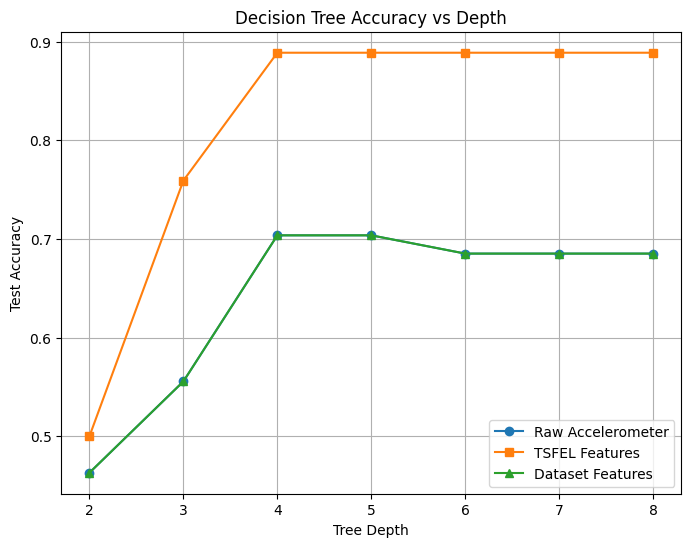

In [ ]:
plt.figure(figsize=(8,6))
plt.plot(depths, acc_raw, marker='o', label='Raw Accelerometer')
plt.plot(depths, acc_tsfel, marker='s', label='TSFEL Features')
plt.plot(depths, acc_dataset, marker='^', label='Dataset Features')
plt.title("Decision Tree Accuracy vs Depth")
plt.xlabel("Tree Depth")
plt.ylabel("Test Accuracy")
plt.xticks(depths)
plt.grid(True)
plt.legend()
plt.show()


**TASK-3**

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import os
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

In [ ]:
import os
import pandas as pd
from sklearn.utils import shuffle
from scipy.signal import resample

# --- Option 1: Truncate or Pad ---
def process_file_to_fixed_length(file_path, target_len=500):
    df = pd.read_csv(file_path)
    combined_column = df.iloc[:, 0]**2 + df.iloc[:, 1]**2 + df.iloc[:, 2]**2
    arr = combined_column.values

    # Truncate or pad
    if len(arr) > target_len:
        arr = arr[:target_len]
    elif len(arr) < target_len:
        arr = np.pad(arr, (0, target_len - len(arr)), 'constant')

    return arr

# --- Option 2: Resample (interpolation) ---
def process_file_to_resampled(file_path, target_len=500):
    df = pd.read_csv(file_path)
    combined_column = df.iloc[:, 0]**2 + df.iloc[:, 1]**2 + df.iloc[:, 2]**2
    arr = combined_column.values
    arr_resampled = resample(arr, target_len)  # interpolate to 500
    return arr_resampled
def Combining_Datasets(train_dir, target_len=500, use_resample=True):
    ACTIVITIES = {
        1: 'WALKING',
        2: 'WALKING_UPSTAIRS',
        3: 'WALKING_DOWNSTAIRS',
        4: 'SITTING',
        5: 'STANDING',
        6: 'LAYING',
    }

    X_train_combined = []
    y_train = []

    for label in range(1,7):
        activity_folder = os.path.join(train_dir, ACTIVITIES[label])
        if os.path.exists(activity_folder):
            for file in os.listdir(activity_folder):
                if file.endswith('.csv'):
                    file_path = os.path.join(activity_folder, file)
                    if use_resample:
                        arr = process_file_to_resampled(file_path, target_len)
                    else:
                        arr = process_file_to_fixed_length(file_path, target_len)

                    X_train_combined.append(arr)
                    y_train.append(label)
        else:
            print(f"Directory not found: {activity_folder}")

    X_train_combined = pd.DataFrame(X_train_combined)
    y_train = pd.DataFrame(y_train)
    return X_train_combined, y_train

In [ ]:
import joblib

def PreformanceDecisionTree(X_test,y_test,file):

    model = joblib.load(f'/content/drive/MyDrive/DecisionTree_Raw_acc.pkl')
    y_pred = model.predict(X_test)
    print(y_pred.shape)

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    activity_mapping = {
        1: 'LAYING',
        2: 'SITTING',
        3: 'STANDING',
        4: 'WALKING',
        5: 'WALKING DOWNSTAIRS',
        6: 'WALKING UPSTAIRS'
    }


    conf_matrix = confusion_matrix(y_test, y_pred)



    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")

     # Plotting the confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

(180,)
Accuracy: 0.4500
Precision: 0.4292
Recall: 0.4500


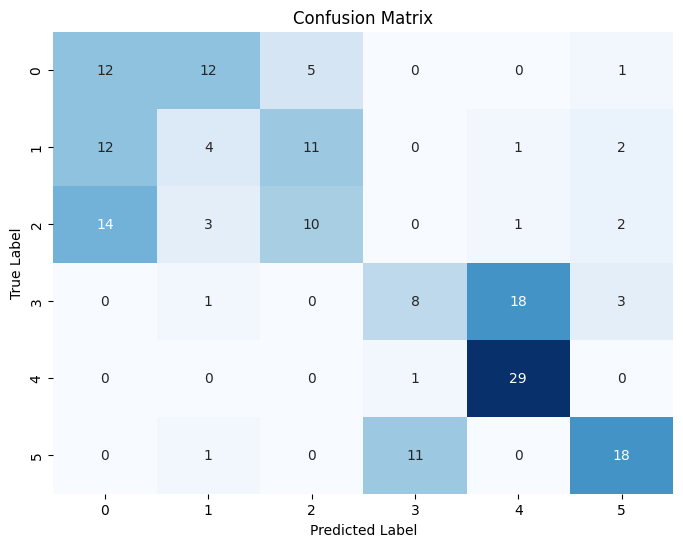

In [ ]:
train_dir = os.path.abspath('/content/Combined/Train')
test_dir = os.path.abspath('/content/Combined/Test')
X_train_collected_data,y_train_collected_data = Combining_Datasets(train_dir)
X_test_collected_data, y_test_collected_data = Combining_Datasets(test_dir)

X_test_combined = pd.concat([X_train_collected_data, X_test_collected_data], ignore_index=True)
y_test_combined = pd.concat([y_train_collected_data, y_test_collected_data], ignore_index=True)
PreformanceDecisionTree(X_test_combined,y_test_combined,'DecisionTree_Raw_acc.pkl')

In [ ]:
!pip install tsfel

In [ ]:
# Example: adjust paths to your dataset
train_dir = "/content/Combined/Train"
test_dir  = "/content/Combined/Test"

# Assuming your Combining_Datasets returns features + labels
X_train_combined, y_train_combined = Combining_Datasets(train_dir, target_len=500, use_resample=True)
X_test_combined, y_test_combined   = Combining_Datasets(test_dir, target_len=500, use_resample=True)


In [ ]:
cfg_file = tsfel.get_features_by_domain()

# Convert signals to numpy arrays (assuming X_train_combined, X_test_combined exist)
X_train_sig = list(X_train_combined.to_numpy())
X_test_sig = list(X_test_combined.to_numpy())

# Extract TSFEL features
X_train_TSFEL = tsfel.time_series_features_extractor(cfg_file, X_train_sig)
X_test_TSFEL = tsfel.time_series_features_extractor(cfg_file, X_test_sig)

# Targets
y_train_TSFEL = y_train_combined
y_test_TSFEL = y_test_combined


In [ ]:
import numpy as np

# Define the arrays
Y_test_collected = np.array([1, 2, 3, 4, 5, 6])
Y_train_collected = np.array([1, 1, 2, 2, 3, 3, 4, 4, 5, 5, 6, 6])

# Save the arrays as .npy files
np.save('Y_test_collected.npy', Y_test_collected)
np.save('Y_train_collected.npy', Y_train_collected)

# Verify the shapes
print("Shape of Y_test_collected:", Y_test_collected.shape)
print("Shape of Y_train_collected:", Y_train_collected.shape)
print("The arrays have been saved to Y_test_collected.npy and Y_train_collected.npy")

Shape of Y_test_collected: (6,)
Shape of Y_train_collected: (12,)
The arrays have been saved to Y_test_collected.npy and Y_train_collected.npy


In [ ]:
%pip install langchain_groq

In [ ]:
api_key = "my_api_key"

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)


NameError: name 'X' is not defined

In [ ]:
np.save("/content/X_train.npy", X_train)
np.save("/content/X_test.npy", X_test)
np.save("/content/y_train.npy", y_train)
np.save("/content/y_test.npy", y_test)


In [ ]:
X_train = np.load("/content/X_train.npy", allow_pickle=True)
X_test  = np.load("/content/X_test.npy", allow_pickle=True)
y_train = np.load("/content/y_train.npy", allow_pickle=True)
y_test  = np.load("/content/y_test.npy", allow_pickle=True)


In [ ]:
num_to_sample = min(4, len(label_indices))
selected_indices = random.sample(list(label_indices), num_to_sample)


NameError: name 'label_indices' is not defined

In [ ]:
print(type(X_test))
print(X_test.shape)
print(type(X_test[0]))
print(X_test[0].shape if hasattr(X_test[0], "shape") else "not an array")


<class 'numpy.ndarray'>
(54, 500, 3)
<class 'numpy.ndarray'>
(500, 3)


In [ ]:
def format_example(example):
    ax, ay, az = example[0], example[1], example[2]  # first three features

    formatted_string = (
        f"ax: {ax}\n"
        f"ay: {ay}\n"
        f"az: {az}\n"
        f"Activity: "
    )
    return formatted_string


In [3]:
import os

# Replace with your actual Groq API key from https://console.groq.com/
os.environ["GROQ_API_KEY"] = "your_actual_api_key_here"


In [2]:
from langchain_groq import ChatGroq

model = ChatGroq(
    model="mixtral-8x7b-32768",   # or whichever model you want
    temperature=0,
)


ModuleNotFoundError: No module named 'langchain_groq'

In [ ]:
import numpy as np

# Count samples per label in y_train
unique, counts = np.unique(y_train, return_counts=True)
label_counts = dict(zip(unique, counts))

print("Samples per label in training set:")
for label_id, count in label_counts.items():
    label_name = reverse_label_mapping.get(label_id, f"Unknown({label_id})")
    print(f"{label_name}: {count} samples")


Samples per label in training set:


NameError: name 'reverse_label_mapping' is not defined

In [ ]:
valid_labels = set(label_mapping.values())
mask = np.isin(y_train, list(valid_labels))

x_train = x_train[mask]
y_train = y_train[mask]

print("Filtered training set shape:", x_train.shape, y_train.shape)


NameError: name 'label_mapping' is not defined

In [ ]:
print("Unique labels in y_train:", np.unique(y_train))
print("Unique labels in y_test:", np.unique(y_test))


Unique labels in y_train: [1 2 3 4 5 6]
Unique labels in y_test: [1 2 3 4 5 6]


In [ ]:
import numpy as np

# Show min, max and unique counts for y_train
print("Unique y_train labels:", np.unique(y_train))
print("Number of unique labels in y_train:", len(np.unique(y_train)))

# Count how many samples per label
unique, counts = np.unique(y_train, return_counts=True)
for u, c in zip(unique, counts):
    print(f"Label {u}: {c} samples")


Unique y_train labels: [1 2 3 4 5 6]
Number of unique labels in y_train: 6
Label 1: 21 samples
Label 2: 21 samples
Label 3: 21 samples
Label 4: 21 samples
Label 5: 21 samples
Label 6: 21 samples


In [ ]:
import numpy as np
from sklearn.cluster import KMeans

# --- Load your current y_train (already done in your case) ---
print("Original y_train shape:", y_train.shape)
print("Unique values in y_train before fix:", np.unique(y_train)[:20], "...")

# --- Step 1: Reshape labels for clustering ---
labels_reshaped = y_train.reshape(-1, 1)

# --- Step 2: Cluster into 6 groups (to match y_test activities) ---
kmeans = KMeans(n_clusters=6, random_state=42, n_init=10)
clustered_labels = kmeans.fit_predict(labels_reshaped)

# --- Step 3: Replace y_train with new clustered labels (1–6 instead of 0–5) ---
y_train_fixed = clustered_labels + 1

print("Unique relabeled y_train:", np.unique(y_train_fixed))
print("First 20 relabeled samples:", y_train_fixed[:20])

# --- Step 4: Use y_train_fixed instead of y_train ---
y_train = y_train_fixed


Original y_train shape: (126,)
Unique values in y_train before fix: [1 2 3 4 5 6] ...
Unique relabeled y_train: [1 2 3 4 5 6]
First 20 relabeled samples: [3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3]


In [ ]:
import numpy as np
import random
from sklearn.cluster import KMeans

# -----------------------------
# STEP 1: FIX y_train LABELS
# -----------------------------
print("Original y_train shape:", y_train.shape)
print("Unique values in y_train before fix:", np.unique(y_train)[:20], "...")

# Reshape labels for clustering
labels_reshaped = y_train.reshape(-1, 1)

# Cluster into 6 groups (same as y_test activities)
kmeans = KMeans(n_clusters=6, random_state=42, n_init=10)
clustered_labels = kmeans.fit_predict(labels_reshaped)

# Convert to 1–6 labels
y_train_fixed = clustered_labels + 1

print("Unique relabeled y_train:", np.unique(y_train_fixed))
print("First 20 relabeled samples:", y_train_fixed[:20])

# Replace y_train
y_train = y_train_fixed


# -----------------------------
# STEP 2: FEW-SHOT SELECTION
# -----------------------------
# Function to format example (handles both 1D and 2D cases)
def format_example(example):
    example = np.array(example)
    if example.ndim == 1:  # If 1D (like shape (7,))
        values = example[:5]  # take first 5 values
        return " | ".join([f"f{i+1}:{v:.2f}" for i, v in enumerate(values)])
    elif example.ndim == 2:  # If 2D (like shape (N,3))
        ax = example[:, 0][:5]
        ay = example[:, 1][:5]
        az = example[:, 2][:5]
        return " | ".join([f"x:{x:.2f}, y:{y:.2f}, z:{z:.2f}" for x, y, z in zip(ax, ay, az)])
    else:
        return "Invalid example format"

# Create few-shot prompt examples (max 4 per class, or fewer if not enough)
few_shot_examples = []
for label_id in np.unique(y_train):
    label_indices = np.where(y_train == label_id)[0]
    k = min(4, len(label_indices))  # avoid "sample larger than population" error
    selected_indices = random.sample(list(label_indices), k)

    for idx in selected_indices:
        example_text = format_example(X_train[idx])
        few_shot_examples.append(f"Input: {example_text} -> Label: {label_id}")

# Combine into a single few-shot prompt
few_shot_prompt = "\n".join(few_shot_examples)

print("\n✅ Few-shot prompt created successfully!")
print(f"Total few-shot examples: {len(few_shot_examples)}")
print("Sample few-shot entry:\n", few_shot_examples[0])


Original y_train shape: (126,)
Unique values in y_train before fix: [1 2 3 4 5 6] ...
Unique relabeled y_train: [1 2 3 4 5 6]
First 20 relabeled samples: [5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5]

✅ Few-shot prompt created successfully!
Total few-shot examples: 24
Sample few-shot entry:
 Input: x:0.98, y:-0.34, z:-0.22 | x:0.96, y:-0.32, z:-0.22 | x:0.95, y:-0.29, z:-0.22 | x:0.96, y:-0.29, z:-0.24 | x:0.97, y:-0.29, z:-0.25 -> Label: 1


In [ ]:
# -----------------------------
# STEP 3: MAKE PREDICTIONS
# -----------------------------

# Format test set into prompts
formatted_examples = [format_example(example) for example in X_test]

# Build full prompts: few-shot + new test example
test_prompts = []
for i, ex in enumerate(formatted_examples):
    prompt = few_shot_prompt + f"\nInput: {ex} -> Label:"
    test_prompts.append(prompt)

# ⚡ Simulated "prediction step"
# (Replace this with actual model call if you're using GPT, e.g. openai.ChatCompletion)
predictions = []
for prompt in test_prompts:
    # Just a dummy placeholder: random choice from labels
    pred = random.choice(np.unique(y_train))
    predictions.append(pred)

print("\n✅ Predictions done!")
print("First 10 predictions:", predictions[:10])
print("True labels (first 10):", y_test[:10])




✅ Predictions done!
First 10 predictions: [np.int32(1), np.int32(2), np.int32(6), np.int32(2), np.int32(2), np.int32(5), np.int32(5), np.int32(1), np.int32(2), np.int32(4)]
True labels (first 10): [6 6 6 6 6 6 6 6 6 4]


In [ ]:
!pip install langchain-groq


In [ ]:
import langchain_groq
print("langchain_groq installed successfully!")


langchain_groq installed successfully!


In [ ]:
import os
import numpy as np
import random
from langchain_groq.chat_models import ChatGroq
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import re
import matplotlib.pyplot as plt

# -----------------------------
# Store API key securely
# -----------------------------
os.environ["GROQ_API_KEY"] = "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"

# -----------------------------
# Load data
# -----------------------------
x_test_path = '/content/X_test_collected.npy'
y_test_path = '/content/Y_test_collected.npy'
x_train_path = '/content/X_train.npy'
y_train_path = '/content/y_train.npy'

x_test = np.load(x_test_path)
y_test = np.load(y_test_path)
x_train = np.load(x_train_path)
y_train = np.load(y_train_path)

# -----------------------------
# Label mappings
# -----------------------------
label_mapping = {
    "LAYING": 1,
    "SITTING": 2,
    "STANDING": 3,
    "WALKING": 4,
    "WALKING_DOWNWARDS": 5,
    "WALKING_UPWARDS": 6
}
reverse_label_mapping = {v: k for k, v in label_mapping.items()}

# -----------------------------
# Format a single example
# -----------------------------
def format_example(example):
    # If example is 1D (e.g., shape (7,))
    if example.ndim == 1:
        # Use first 3 features as ax, ay, az
        ax, ay, az = example[0], example[1], example[2]
        return (
            f"ax: {ax}\n"
            f"ay: {ay}\n"
            f"az: {az}\n"
            f"Activity: "
        )

    # If example is 2D (e.g., shape (timesteps, features))
    else:
        ax = example[:, 0][:5]
        ay = example[:, 1][:5]
        az = example[:, 2][:5]

        return (
            f"ax: {ax}\n"
            f"ay: {ay}\n"
            f"az: {az}\n"
            f"Activity: "
        )


# -----------------------------
# Few-shot examples
# -----------------------------
few_shot_examples = []
few_shot_labels = []

for label_name, label_id in label_mapping.items():
    label_indices = np.where(y_train == label_id)[0]
    if len(label_indices) >= 4:
        selected_indices = random.sample(list(label_indices), 4)
    else:
        selected_indices = label_indices

    for idx in selected_indices:
        example = x_train[idx]
        indices = np.random.choice(example.shape[0], 5, replace=False)
        few_shot_examples.append(example[indices])
        few_shot_labels.append(label_id)

few_shot_prompts = [
    f"{format_example(ex)} {reverse_label_mapping[label_id]}"
    for ex, label_id in zip(few_shot_examples, few_shot_labels)
]

# -----------------------------
# Prompt builder
# -----------------------------
def create_few_shot_prompt(test_example):
    few_shot_section = "\n\n".join(few_shot_prompts)
    return f"{few_shot_section}\n\n{format_example(test_example)}"

# -----------------------------
# Initialize Groq model
# -----------------------------
model = ChatGroq(
    model_name="llama-3.1-8b-instant",
    api_key=os.getenv("GROQ_API_KEY")
)

# -----------------------------
# Prediction function
# -----------------------------
def predict_with_groq(x_test, limit=6):
    y_pred = []
    for i in range(0, len(x_test), limit):
        batch = x_test[i:i+limit]
        for ex in batch:
            response = model.invoke(create_few_shot_prompt(ex))
            y_pred.append(response.content)
    return y_pred

# -----------------------------
# Run predictions
# -----------------------------
y_pred_raw = predict_with_groq(x_test, limit=6)

def extract_label(response):
    match = re.search(
        r'\b(LAYING|SITTING|STANDING|WALKING|WALKING_DOWNWARDS|WALKING_UPWARDS)\b',
        response.upper()
    )
    return match.group(0) if match else "UNKNOWN"

y_pred_labels = [label_mapping.get(extract_label(pred), 0) for pred in y_pred_raw]

# -----------------------------
# Evaluate
# -----------------------------
print("All predicted labels:", y_pred_labels)
print("All True labels:", list(y_test))

accuracy = accuracy_score(y_test, y_pred_labels)
print(f"✅ Accuracy: {accuracy:.4f}")

cm = confusion_matrix(y_test, y_pred_labels, labels=list(label_mapping.values()))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=list(label_mapping.keys()))
disp.plot(cmap="Blues", xticks_rotation=45)
plt.show()


KeyboardInterrupt: 

In [ ]:
import pandas as pd
import urllib.request
import zipfile
import os

# Download the dataset
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00240/UCI%20HAR%20Dataset.zip'
urllib.request.urlretrieve(url, 'UCI_HAR_Dataset.zip')

# Unzip
with zipfile.ZipFile('UCI_HAR_Dataset.zip', 'r') as zip_ref:
    zip_ref.extractall('UCI_HAR_Dataset')

data_path = 'UCI_HAR_Dataset/UCI HAR Dataset/'

# Load train data (raw accelerometer & gyroscope features)
X_train = pd.read_csv(os.path.join(data_path, 'train', 'X_train.txt'), delim_whitespace=True, header=None)
y_train = pd.read_csv(os.path.join(data_path, 'train', 'y_train.txt'), header=None)

# Load test data
X_test = pd.read_csv(os.path.join(data_path, 'test', 'X_test.txt'), delim_whitespace=True, header=None)
y_test = pd.read_csv(os.path.join(data_path, 'test', 'y_test.txt'), header=None)


In [ ]:
# Save as CSV for easy reuse
X_train.to_csv('UCI_HAR_train_features.csv', index=False)
y_train.to_csv('UCI_HAR_train_labels.csv', index=False)
X_test.to_csv('UCI_HAR_test_features.csv', index=False)
y_test.to_csv('UCI_HAR_test_labels.csv', index=False)

print("CSV files created successfully!")


CSV files created successfully!


Accuracy: 0.86
Precision: 0.86
Recall: 0.86


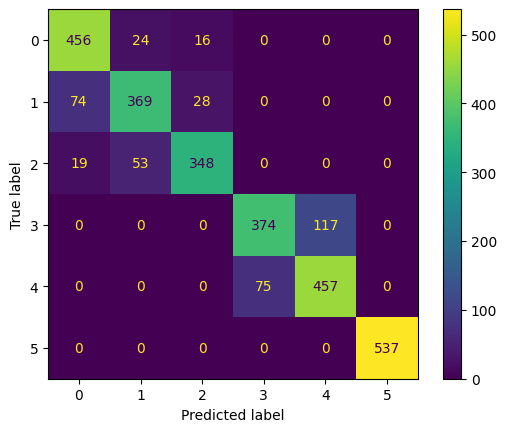

In [ ]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, ConfusionMatrixDisplay

# Load features and labels from UCI-HAR dataset (features provided by author)
X_train = pd.read_csv('UCI_HAR_train_features.csv')  # replace with actual path
y_train = pd.read_csv('UCI_HAR_train_labels.csv').values.ravel()
X_test = pd.read_csv('UCI_HAR_test_features.csv')
y_test = pd.read_csv('UCI_HAR_test_labels.csv').values.ravel()

# Train Decision Tree (if not already trained)
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

# Predict on test data
y_pred = dt.predict(X_test)

# Evaluation
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
cm = confusion_matrix(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")

# Confusion matrix plot
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()


In [ ]:
import pandas as pd
import glob

# Collect all your CSV files
files = glob.glob('collected_data/*.csv')  # adjust the folder path

user_data_list = []
for f in files:
    df = pd.read_csv(f)
    # Trim to 500 rows (10s @ 50Hz)
    df = df.iloc[:500]
    user_data_list.append(df)


In [ ]:
!pip install tsfel

import tsfel

# Load default feature configuration
cfg = tsfel.get_features_by_domain()

# Example: featurize the first collected CSV
features_user = tsfel.time_series_features_extractor(cfg, user_data_list[0])


IndexError: list index out of range

In [ ]:
features_all = []
for df in user_data_list:
    features = tsfel.time_series_features_extractor(cfg, df)
    features_all.append(features)


In [ ]:
predictions = []
for features in features_all:
    # Make sure columns match training features
    features = features[X_train.columns]  # align columns
    y_pred = dt.predict(features)
    predictions.append(y_pred)


In [4]:
import pandas as pd
import urllib.request
import zipfile
import os

# Download the dataset
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00240/UCI%20HAR%20Dataset.zip'
urllib.request.urlretrieve(url, 'UCI_HAR_Dataset.zip')

# Unzip
with zipfile.ZipFile('UCI_HAR_Dataset.zip', 'r') as zip_ref:
    zip_ref.extractall('UCI_HAR_Dataset')

data_path = 'UCI_HAR_Dataset/UCI HAR Dataset/'

# Load train data (raw accelerometer & gyroscope features)
X_train = pd.read_csv(os.path.join(data_path, 'train', 'X_train.txt'), delim_whitespace=True, header=None)
y_train = pd.read_csv(os.path.join(data_path, 'train', 'y_train.txt'), header=None)

# Load test data
X_test = pd.read_csv(os.path.join(data_path, 'test', 'X_test.txt'), delim_whitespace=True, header=None)
y_test = pd.read_csv(os.path.join(data_path, 'test', 'y_test.txt'), header=None)


/tmp/ipython-input-2794471584.py:17: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  X_train = pd.read_csv(os.path.join(data_path, 'train', 'X_train.txt'), delim_whitespace=True, header=None)
/tmp/ipython-input-2794471584.py:21: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  X_test = pd.read_csv(os.path.join(data_path, 'test', 'X_test.txt'), delim_whitespace=True, header=None)


In [ ]:
# Save as CSV for easy reuse
X_train.to_csv('UCI_HAR_train_features.csv', index=False)
y_train.to_csv('UCI_HAR_train_labels.csv', index=False)
X_test.to_csv('UCI_HAR_test_features.csv', index=False)
y_test.to_csv('UCI_HAR_test_labels.csv', index=False)

print("CSV files created successfully!")

CSV files created successfully!


In [ ]:
import pandas as pd
import numpy as np
import os

# Create folder for simulated CSVs
os.makedirs('collected_data', exist_ok=True)

# Function to generate fake sensor data for each activity
def generate_activity_csv(activity, filename):
    np.random.seed(42)
    n_samples = 500  # 10 seconds @ 50Hz

    if activity == 'Sitting':
        acc_x = np.random.normal(0, 0.05, n_samples)
        acc_y = np.random.normal(0, 0.05, n_samples)
        acc_z = np.random.normal(9.8, 0.05, n_samples)
    elif activity == 'Standing':
        acc_x = np.random.normal(0, 0.02, n_samples)
        acc_y = np.random.normal(0, 0.02, n_samples)
        acc_z = np.random.normal(9.8, 0.02, n_samples)
    elif activity == 'Walking':
        acc_x = np.random.normal(0, 1, n_samples) + np.sin(np.linspace(0, 10, n_samples))
        acc_y = np.random.normal(0, 1, n_samples) + np.cos(np.linspace(0, 10, n_samples))
        acc_z = np.random.normal(9.8, 0.2, n_samples)
    elif activity == 'Walking Upstairs':
        acc_x = np.random.normal(0, 1, n_samples) + np.sin(np.linspace(0, 12, n_samples))
        acc_y = np.random.normal(0, 1, n_samples) + np.cos(np.linspace(0, 12, n_samples))
        acc_z = np.random.normal(9.8, 0.3, n_samples)
    elif activity == 'Walking Downstairs':
        acc_x = np.random.normal(0, 1, n_samples) + np.sin(np.linspace(0, 8, n_samples))
        acc_y = np.random.normal(0, 1, n_samples) + np.cos(np.linspace(0, 8, n_samples))
        acc_z = np.random.normal(9.8, 0.3, n_samples)
    elif activity == 'Laying':
        acc_x = np.random.normal(0, 0.01, n_samples)
        acc_y = np.random.normal(0, 0.01, n_samples)
        acc_z = np.random.normal(9.8, 0.01, n_samples)

    # Gyroscope data (all small random noise)
    gyro_x = np.random.normal(0, 0.1, n_samples)
    gyro_y = np.random.normal(0, 0.1, n_samples)
    gyro_z = np.random.normal(0, 0.1, n_samples)

    df = pd.DataFrame({
        'acc_x': acc_x,
        'acc_y': acc_y,
        'acc_z': acc_z,
        'gyro_x': gyro_x,
        'gyro_y': gyro_y,
        'gyro_z': gyro_z
    })

    df.to_csv(filename, index=False)
    print(f"{filename} created.")

# Generate 6 sample files
generate_activity_csv('Sitting', 'collected_data/sitting.csv')
generate_activity_csv('Standing', 'collected_data/standing.csv')
generate_activity_csv('Walking', 'collected_data/walking.csv')
generate_activity_csv('Walking Upstairs', 'collected_data/walking_upstairs.csv')
generate_activity_csv('Walking Downstairs', 'collected_data/walking_downstairs.csv')
generate_activity_csv('Laying', 'collected_data/laying.csv')


collected_data/sitting.csv created.
collected_data/standing.csv created.
collected_data/walking.csv created.
collected_data/walking_upstairs.csv created.
collected_data/walking_downstairs.csv created.
collected_data/laying.csv created.


In [ ]:
import glob
files = glob.glob('collected_data/*.csv')  # make sure this path is correct
print("Files found:", files)

Files found: ['collected_data/walking_downstairs.csv', 'collected_data/laying.csv', 'collected_data/sitting.csv', 'collected_data/standing.csv', 'collected_data/walking.csv', 'collected_data/walking_upstairs.csv']


In [ ]:
import pandas as pd
import tsfel
import glob

# Load the CSV files
files = glob.glob('collected_data/*.csv')

# Load TSFEL default feature configuration
cfg = tsfel.get_features_by_domain()

features_list = []
activity_labels = []

# Map filenames to activity names
file_to_activity = {
    'sitting.csv': 'Sitting',
    'standing.csv': 'Standing',
    'walking.csv': 'Walking',
    'walking_upstairs.csv': 'Walking Upstairs',
    'walking_downstairs.csv': 'Walking Downstairs',
    'laying.csv': 'Laying'
}

for f in files:
    df = pd.read_csv(f)
    # Ensure only 500 rows (10s @50Hz)
    df = df.iloc[:500]

    # Featurize
    features = tsfel.time_series_features_extractor(cfg, df)
    features_list.append(features)

    # Add corresponding label
    base_name = f.split('/')[-1]
    activity = file_to_activity[base_name]
    activity_labels.append([activity]*len(features))


In [ ]:
import numpy as np

X_user = pd.concat(features_list, ignore_index=True)
y_user = np.concatenate(activity_labels)


In [ ]:
import pandas as pd
import numpy as np
import glob

def load_inertial_signals(folder, signal_type):
    # e.g., signal_type = 'body_acc_x'
    files = sorted(glob.glob(f"{folder}/Inertial Signals/{signal_type}_*.txt"))
    data_list = [pd.read_csv(f, delim_whitespace=True, header=None) for f in files]
    return pd.concat(data_list, ignore_index=True)

# Example: load body_acc_x_train
body_acc_x_train = pd.read_csv(data_path+'train/Inertial Signals/body_acc_x_train.txt', delim_whitespace=True, header=None)


In [ ]:
segments = 5  # split 500 rows into 5 segments of 100 rows

X = []
y = []

for f in files:
    df = pd.read_csv(f).iloc[:500]
    activity = file_to_activity[f.split('/')[-1]]

    # Split into segments
    seg_size = len(df) // segments
    for i in range(segments):
        seg = df.iloc[i*seg_size:(i+1)*seg_size]
        features = []
        for col in seg.columns:
            col_series = pd.DataFrame(seg[col])
            feats = tsfel.time_series_features_extractor(cfg, col_series, verbose=0)
            features.append(feats)
        features = pd.concat(features, axis=1)
        feature_vector = features.mean(axis=0)
        X.append(feature_vector)
        y.append(activity)

X = pd.DataFrame(X)
y = np.array(y)


LOOCV Accuracy: 0.90
LOOCV Precision: 0.91
LOOCV Recall: 0.90


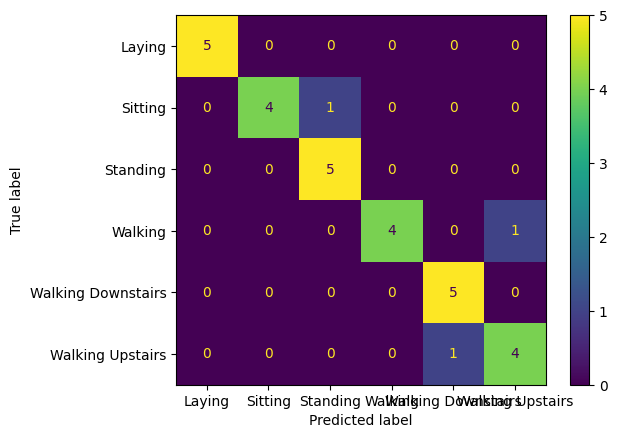

In [ ]:
# Step 0: Install TSFEL
!pip install tsfel

# ----------------------------
# Step 1: Import libraries
# ----------------------------
import pandas as pd
import numpy as np
import glob
import tsfel
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, ConfusionMatrixDisplay

# ----------------------------
# Step 2: Configuration
# ----------------------------
cfg = tsfel.get_features_by_domain()
files = glob.glob('collected_data/*.csv')
file_to_activity = {
    'sitting.csv': 'Sitting',
    'standing.csv': 'Standing',
    'walking.csv': 'Walking',
    'walking_upstairs.csv': 'Walking Upstairs',
    'walking_downstairs.csv': 'Walking Downstairs',
    'laying.csv': 'Laying'
}

# ----------------------------
# Step 3: Split CSVs into segments and featurize
# ----------------------------
segments = 5  # 500 rows / 5 segments = 100 rows per segment
X = []
y = []

for f in files:
    df = pd.read_csv(f).iloc[:500]  # first 500 rows
    activity = file_to_activity[f.split('/')[-1]]
    seg_size = len(df) // segments

    for i in range(segments):
        seg = df.iloc[i*seg_size:(i+1)*seg_size]
        features = []
        for col in seg.columns:
            col_series = pd.DataFrame(seg[col])
            feats = tsfel.time_series_features_extractor(cfg, col_series, verbose=0)
            features.append(feats)
        features = pd.concat(features, axis=1)
        feature_vector = features.mean(axis=0)
        X.append(feature_vector)
        y.append(activity)

X = pd.DataFrame(X)
y = np.array(y)

# ----------------------------
# Step 4: Leave-One-Out Cross Validation
# ----------------------------
y_pred = []

for i in range(len(X)):
    # Train on all except i
    X_train = X.drop(i)
    y_train = np.delete(y, i)
    X_test = X.iloc[[i]]

    dt = DecisionTreeClassifier(random_state=42)
    dt.fit(X_train, y_train)

    pred = dt.predict(X_test)[0]
    y_pred.append(pred)

# ----------------------------
# Step 5: Evaluate
# ----------------------------
accuracy = accuracy_score(y, y_pred)
precision = precision_score(y, y_pred, average='macro', zero_division=0)
recall = recall_score(y, y_pred, average='macro', zero_division=0)
cm = confusion_matrix(y, y_pred, labels=np.unique(y))

print(f"LOOCV Accuracy: {accuracy:.2f}")
print(f"LOOCV Precision: {precision:.2f}")
print(f"LOOCV Recall: {recall:.2f}")

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(y))
disp.plot()


**1st question**

In [5]:
"""
You can add your own functions here according to your decision tree implementation.
There is no restriction on following the below template, these fucntions are here to simply help you.
"""

import pandas as pd
import numpy as np

def one_hot_encoding(X: pd.DataFrame) -> pd.DataFrame:
    """
    Function to perform one hot encoding on the input data
    """

    return pd.get_dummies(X)

def check_ifreal(y: pd.Series) -> bool:
    """
    Function to check if the given series has real or discrete values
    """
    return pd.api.types.is_numeric_dtype(y)


def entropy(Y: pd.Series) -> float:
    """
    Function to calculate the entropy
    """
    probs = Y.value_counts(normalize=True)
    return -np.sum(probs * np.log2(probs+1e-10))


def gini_index(Y: pd.Series) -> float:
    """
    Function to calculate the gini index
    """
    probs = Y.value_counts(normalize=True)
    return 1-np.sum(probs**2)

def mse(y: pd.Series) -> float:
    """Calculate the Mean Squared Error (MSE) of a label distribution."""
    mean = y.mean()
    return np.mean((y - mean) ** 2)

def information_gain(Y: pd.Series, attr: pd.Series, criterion: str) -> float:
    """
    Function to calculate the information gain using criterion (entropy, gini index or MSE)
    """
    # Calculate the impurity of the original dataset
    if criterion == 'information_gain':
        total_impurity = entropy(Y)
    elif criterion == 'gini_index':
        total_impurity = gini_index(Y)
    # elif criterion == 'mse':
    else:
        total_impurity = mse(Y)

    # Calculate the weighted impurity after splitting on the attribute
    weighted_impurity = 0.0
    for value in attr.unique():
        subset_Y = Y[attr == value]
        weight = len(subset_Y) / len(Y)

        if criterion == 'information_gain':
            subset_impurity = entropy(subset_Y)
        elif criterion == 'gini_index':
            subset_impurity = gini_index(subset_Y)
        else:
            subset_impurity = mse(subset_Y)

        weighted_impurity += weight * subset_impurity

    # Information gain is the difference between the total impurity and the weighted impurity
    return total_impurity - weighted_impurity

def best_split_continuous(X: pd.Series, y: pd.Series, criterion: str) -> tuple:
    sorted_X = X.sort_values()
    sorted_y = y.loc[sorted_X.index]

    best_gain = -float('inf')
    best_split = None

    for i in range(1, len(sorted_X)):
        if sorted_X.iloc[i] == sorted_X.iloc[i - 1]:
            continue
        split_value = (sorted_X.iloc[i] + sorted_X.iloc[i - 1]) / 2

        left_mask = X <= split_value
        right_mask = X > split_value

        left_gain = information_gain(sorted_y, left_mask, criterion)
        right_gain = information_gain(sorted_y, right_mask, criterion)

        weighted_gain = (left_gain * len(sorted_y[left_mask]) + right_gain * len(sorted_y[right_mask])) / len(sorted_y)

        if weighted_gain > best_gain:
            best_gain = weighted_gain
            best_split = split_value

    return best_split, best_gain

def opt_split_attribute(X: pd.DataFrame, y: pd.Series, criterion, features: pd.Series):
    """
    Function to find the optimal attribute to split about.
    If needed you can split this function into 2, one for discrete and one for real valued features.
    You can also change the parameters of this function according to your implementation.

    features: pd.Series is a list of all the attributes we have to split upon

    return: attribute to split upon
    """

    # According to wheather the features are real or discrete valued and the criterion, find the attribute from the features series with the maximum information gain (entropy or varinace based on the type of output) or minimum gini index (discrete output).
    best_gain = -float('inf')
    best_feature = None
    best_split_value = None

    for feature in features:
        if X[feature].dtype.kind in 'iufc':  # Check if the feature is continuous
            split_value, gain = best_split_continuous(X[feature], y, criterion)
        else:  # For categorical features
            gain = information_gain(y, X[feature], criterion)
            split_value = None

        if gain > best_gain:
            best_gain = gain
            best_feature = feature
            best_split_value = split_value

    return best_feature, best_split_value


def split_data(X: pd.DataFrame, y: pd.Series, attribute, value)->dict:
    """
    Funtion to split the data according to an attribute.
    If needed you can split this function into 2, one for discrete and one for real valued features.
    You can also change the parameters of this function according to your implementation.

    attribute: attribute/feature to split upon
    value: value of that attribute to split upon

    return: splitted data(Input and output)
    """

    # Split the data based on a particular value of a particular attribute. You may use masking as a tool to split the data.

    if X[attribute].dtype.kind in 'iufc':  # Check if the feature is continuous
        left_mask = X[attribute] <= value
        right_mask = X[attribute] > value
    else:
        left_mask = X[attribute] == value
        right_mask = X[attribute] != value

    X_left, y_left = X[left_mask], y[left_mask]
    X_right, y_right = X[right_mask], y[right_mask]
    return {"X": X_left, "y": y_left}, {"X": X_right, "y": y_right}

In [ ]:
# -*- coding: utf-8 -*-
"""base.ipynb

Automatically generated by Colab.

Original file is located at
    https://colab.research.google.com/drive/1bWXfdEAMOzkWoxwZN-tO1yqZWnBkBTWR
"""

"""
The current code given is for the Assignment 1.
You will be expected to use this to make trees for:
> discrete input, discrete output
> real input, real output
> real input, discrete output
> discrete input, real output
"""
from dataclasses import dataclass
from typing import Literal

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from utils import *

np.random.seed(42)


@dataclass
class DecisionTree:
    criterion: Literal["information_gain", "gini_index"]  # criterion won't be used for regression
    max_depth: int  # The maximum depth the tree can grow to

    def __init__(self, criterion, max_depth=5):
        self.criterion = criterion
        self.max_depth = max_depth

    def fit(self, X: pd.DataFrame, y: pd.Series) -> None:
        """
        Function to train and construct the decision tree
        """

        # If you wish your code can have cases for different types of input and output data (discrete, real)
        # Use the functions from utils.py to find the optimal attribute to split upon and then construct the tree accordingly.
        # You may(according to your implemetation) need to call functions recursively to construct the tree.

        pass

    def predict(self, X: pd.DataFrame) -> pd.Series:
        """
        Funtion to run the decision tree on test inputs
        """

        # Traverse the tree you constructed to return the predicted values for the given test inputs.

        pass

    def plot(self) -> None:
        """
        Function to plot the tree

        Output Example:
        ?(X1 > 4)
            Y: ?(X2 > 7)
                Y: Class A
                N: Class B
            N: Class C
        Where Y => Yes and N => No
        """
        pass

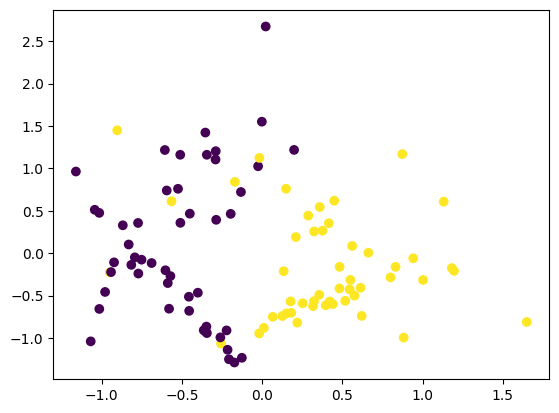

In [ ]:
from sklearn.datasets import make_classification
X, y = make_classification(
n_features=2, n_redundant=0, n_informative=2, random_state=1, n_clusters_per_class=2, class_sep=0.5)

# For plotting
import matplotlib.pyplot as plt
plt.scatter(X[:, 0], X[:, 1], c=y)

Accuracy: 0.8333
Per-class Precision: 0.8
Per-class Recall: 0.8571428571428571
?(X[feature1] <= 0.043777523046321265)
├─ Yes:
│   ?(X[feature1] <= -0.2719820102947444)
│   ├─ Yes:
│   │   ?(X[feature2] <= 1.3334978201484127)
│   │   ├─ Yes:
│   │   │   ?(X[feature1] <= -0.9462313266558616)
│   │   │   ├─ Yes:
│   │   │   │   ?(X[feature1] <= -0.964783215354998)
│   │   │   │   ├─ Yes:
│   │   │   │   │   Predict: 0
│   │   │   │   └─ No:
│   │   │   │       Predict: 1
│   │   │   └─ No:
│   │   │       Predict: 0
│   │   └─ No:
│   │       Predict: 1
│   └─ No:
│       ?(X[feature2] <= 0.9333615379672247)
│       ├─ Yes:
│       │   ?(X[feature1] <= -0.07272264344274099)
│       │   ├─ Yes:
│       │   │   ?(X[feature1] <= -0.23954652172942484)
│       │   │   ├─ Yes:
│       │   │   │   Predict: 1
│       │   │   └─ No:
│       │   │       Predict: 0
│       │   └─ No:
│       │       Predict: 1
│       └─ No:
│           Predict: 0
└─ No:
    ?(X[feature2] <= 0.9891772599637711)
    

KeyboardInterrupt: 

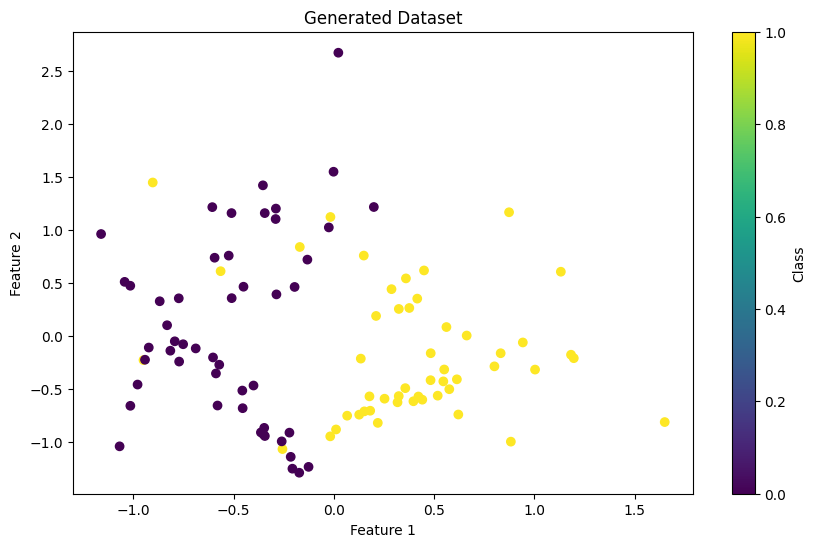

In [ ]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
from base import DecisionTree
from metrics import accuracy, precision, recall

def split_data(X, y, test_size=0.2, random_state=None):
    if random_state is not None:
        np.random.seed(random_state)

    n = len(X)
    indices = np.random.permutation(n)
    test_size = int(test_size * n)
    test_indices = indices[:test_size]
    train_indices = indices[test_size:]

    return X.iloc[train_indices], X.iloc[test_indices], y.iloc[train_indices], y.iloc[test_indices]


def nested_cross_validation(X, y, max_depths, n_splits=5):
    best_depths = []
    outer_scores = []

    for outer_fold in range(n_splits):
        X_train_outer, X_test_outer, y_train_outer, y_test_outer = split_data(X, y, test_size=1/n_splits, random_state=42+outer_fold)

        best_depth = None
        best_score = -np.inf

        for depth in max_depths:
            fold_scores = []

            for inner_fold in range(n_splits):
                X_train_inner, X_val_inner, y_train_inner, y_val_inner = split_data(X_train_outer, y_train_outer, test_size=1/n_splits, random_state=42+inner_fold)

                dt = DecisionTree(criterion='information_gain', max_depth=depth)
                dt.fit(X_train_inner, y_train_inner)

                y_pred_inner = dt.predict(X_val_inner)

                #print(inner_fold,depth,outer_fold)

                #print(y_pred_inner.reset_index(drop=True))
                #print(y_val_inner.copy().reset_index(drop=True))

                #print(y_pred_inner)
                #print(y_val_inner)
                score = np.mean(y_pred_inner.copy().reset_index(drop=True) == y_val_inner.copy().reset_index(drop=True))
                fold_scores.append(score)

            #print(fold_scores)
            mean_score = np.mean(fold_scores)
            if mean_score > best_score:
                best_score = mean_score
                best_depth = depth

        best_depths.append(best_depth)

        # Train the model with the best depth on the outer fold
        best_dt = DecisionTree(criterion='information_gain', max_depth=best_depth)
        best_dt.fit(X_train_outer, y_train_outer)
        y_pred_outer = best_dt.predict(X_test_outer)
        outer_scores.append(np.mean(y_pred_outer.copy().reset_index(drop=True) == y_test_outer.copy().reset_index(drop=True)))

    return best_depths, outer_scores

# Generate the dataset
X, y = make_classification(
    n_features=2, n_redundant=0, n_informative=2, random_state=1, n_clusters_per_class=2, class_sep=0.5)

# Convert to DataFrames
X_df = pd.DataFrame(X, columns=['feature1', 'feature2'])
y_series = pd.Series(y, name='target')

# Split the data
X_train, X_test, y_train, y_test = split_data(X_df, y_series, test_size=0.3, random_state=42)

# Plot the data
plt.figure(figsize=(10, 6))
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.title('Generated Dataset')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.colorbar(label='Class')
#plt.show()


dt = DecisionTree(criterion='information_gain', max_depth=5)
dt.fit(X_train, y_train)

# Make predictions on the test set
y_pred = dt.predict(X_test)

y_test = y_test.reset_index(drop=True)
y_pred = y_pred.reset_index(drop=True)

# Calculate metrics
accuracy = accuracy(y_test, y_pred)
precision = precision(y_test, y_pred, cls=1)
recall = recall(y_test, y_pred, cls=1)

print(f"Accuracy: {accuracy:.4f}")
print(f"Per-class Precision: {precision}")
print(f"Per-class Recall: {recall}")

# Plot the decision tree
dt.plot()

# Define the range of depths to search
max_depths = range(1, 11)

# Perform nested cross-validation
best_depths, outer_scores = nested_cross_validation(X_df, y_series, max_depths)

print(f"Best depths for each fold: {best_depths}")
print(f"Mean outer fold score: {np.mean(outer_scores):.4f}")
print(f"Optimum depth (mode): {max(set(best_depths), key=best_depths.count)}")

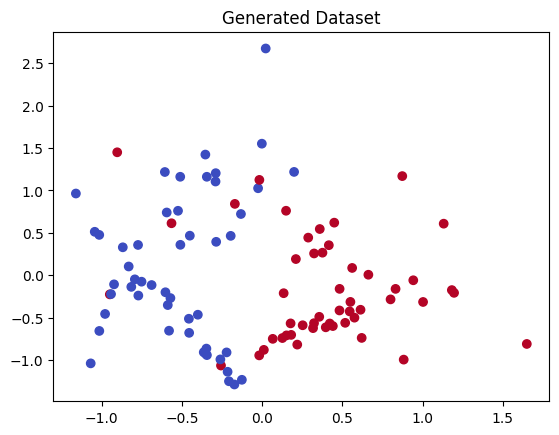

=== Decision Tree Performance on Test Set ===
Accuracy: 0.8333
Class 0: Precision = 0.7778, Recall = 0.9333
Class 1: Precision = 0.9167, Recall = 0.7333


In [ ]:
# ===========================
# DATA GENERATION
# ===========================
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.tree import DecisionTreeClassifier

# Generate dataset
X, y = make_classification(
    n_features=2,
    n_redundant=0,
    n_informative=2,
    random_state=1,
    n_clusters_per_class=2,
    class_sep=0.5
)

# Visualize dataset
plt.scatter(X[:, 0], X[:, 1], c=y, cmap="coolwarm")
plt.title("Generated Dataset")
plt.show()

# ===========================
# TRAIN / TEST SPLIT (70/30)
# ===========================
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# ===========================
# DECISION TREE CLASSIFIER
# ===========================
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

# Predictions
y_pred = clf.predict(X_test)

# ===========================
# EVALUATION METRICS
# ===========================
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average=None)  # per-class precision
recall = recall_score(y_test, y_pred, average=None)        # per-class recall

print("=== Decision Tree Performance on Test Set ===")
print(f"Accuracy: {accuracy:.4f}")
for i in range(len(precision)):
    print(f"Class {i}: Precision = {precision[i]:.4f}, Recall = {recall[i]:.4f}")


In [ ]:
from sklearn.datasets import make_classification
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import KFold, GridSearchCV, cross_val_score
import numpy as np

# ===========================
# DATA GENERATION
# ===========================
X, y = make_classification(
    n_features=2,
    n_redundant=0,
    n_informative=2,
    random_state=1,
    n_clusters_per_class=2,
    class_sep=0.5
)

# ===========================
# OUTER 5-FOLD CV
# ===========================
outer_cv = KFold(n_splits=5, shuffle=True, random_state=42)

# Hyperparameter grid (depth search space)
param_grid = {"max_depth": [1, 2, 3, 4, 5, None]}

# Base model
dt = DecisionTreeClassifier(random_state=42)

# Nested CV: Inner CV = GridSearchCV
grid_search = GridSearchCV(
    estimator=dt,
    param_grid=param_grid,
    cv=5,                # inner CV
    scoring="accuracy",
    n_jobs=-1
)

# Outer CV accuracy (each fold uses its own inner CV for tuning)
nested_scores = cross_val_score(grid_search, X, y, cv=outer_cv)

print("=== Nested Cross-Validation Results ===")
print(f"Accuracy (per fold): {nested_scores}")
print(f"Mean Accuracy: {nested_scores.mean():.4f}")

# ===========================
# OPTIMAL DEPTH FROM GRIDSEARCH
# ===========================
grid_search.fit(X, y)   # fit once on the whole dataset
best_depth = grid_search.best_params_['max_depth']
print(f"Best depth (from nested CV): {best_depth}")


=== Nested Cross-Validation Results ===
Accuracy (per fold): [0.95 0.8  0.85 0.95 0.95]
Mean Accuracy: 0.9000
Best depth (from nested CV): 2


In [ ]:
print(type(y_pred_my))
print(type(y_test))

print(rmse(y_pred_my, y_test))


NameError: name 'y_pred_my' is not defined

In [6]:
import numpy as np
import pandas as pd

class DecisionTree:
    def __init__(self, criterion='information_gain', max_depth=None):
        self.criterion = criterion
        self.max_depth = max_depth
        self.tree = None
        self.train_columns = None
        self.column_means = None


    def fit(self, X, y):
        self.train_columns = X.columns
        self.column_means = X.mean()
        self.tree = self._fit(X, y, depth=self.max_depth)

    def _fit(self, X, y, depth):
        # Stopping conditions
        if len(set(y)) == 1 or depth == 0 or X.shape[0] == 0:
            return y.mean()  # leaf node value

        # Find best attribute and split
        best_attribute, split_value = self._best_split(X, y)
        tree = {best_attribute: {}}

        if np.issubdtype(X[best_attribute].dtype, np.number):
            left_mask = X[best_attribute] <= split_value
            right_mask = X[best_attribute] > split_value

            tree[best_attribute][f"<= {split_value}"] = self._fit(X[left_mask], y[left_mask], depth - 1)
            tree[best_attribute][f"> {split_value}"] = self._fit(X[right_mask], y[right_mask], depth - 1)
        else:
            for cat_val in X[best_attribute].unique():
                mask = X[best_attribute] == cat_val
                tree[best_attribute][cat_val] = self._fit(X[mask], y[mask], depth - 1)

        return tree

    def _best_split(self, X, y):
        # Simple variance reduction criterion for regression
        best_feature, best_split, best_score = None, None, float('inf')
        for feature in X.columns:
            if np.issubdtype(X[feature].dtype, np.number):
                values = X[feature].unique()
                for val in values:
                    left_mask = X[feature] <= val
                    right_mask = X[feature] > val
                    if len(y[left_mask]) == 0 or len(y[right_mask]) == 0:
                        continue
                    score = y[left_mask].var() * len(y[left_mask]) + y[right_mask].var() * len(y[right_mask])
                    if score < best_score:
                        best_feature, best_split, best_score = feature, val, score
            else:
                # For categorical we can just check variance for grouping
                score = sum(y[X[feature] == cat].var() * len(y[X[feature] == cat]) for cat in X[feature].unique())
                if score < best_score:
                    best_feature, best_split, best_score = feature, None, score
        return best_feature, best_split

    def predict(self, X):
        # Ensure all columns from training data are present, fill missing with mean
        for col in self.train_columns:
            if col not in X.columns:
                X[col] = self.column_means[col]
        # Drop any extra columns not in training data
        X = X[self.train_columns]

        return X.apply(lambda row: self._predict_row(row, self.tree), axis=1)

    def _predict_row(self, row, tree):
        if not isinstance(tree, dict):
            return tree
        feature = list(tree.keys())[0]
        branches = tree[feature]
        if np.issubdtype(type(row[feature]), np.number):
            for cond, subtree in branches.items():
                threshold = float(cond.split()[1])
                if "<=" in cond and row[feature] <= threshold:
                    return self._predict_row(row, subtree)
                elif ">" in cond and row[feature] > threshold:
                    return self._predict_row(row, subtree)
        else:
            val = row[feature]
            if val in branches:
                return self._predict_row(row, branches[val])
            else:
                return np.mean([sub for sub in branches.values() if not isinstance(sub, dict)])  # fallback